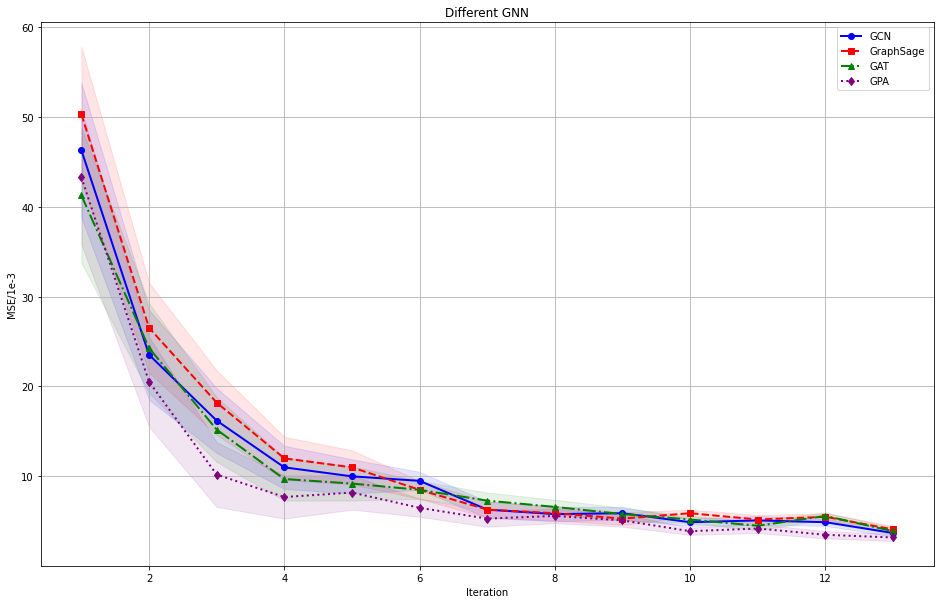

<Figure size 432x288 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的迭代次数和准确率数据
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
y1 = np.array([46.26, 23.52, 16.2, 11., 10., 9.5, 6.3, 5.8, 5.9, 4.9, 5.1, 4.9, 3.7])
y2 = np.array([50.26, 26.52, 18.2, 12., 11., 8.5, 6.3, 5.9, 5.3, 5.9, 5.2, 5.5, 4.1])
y3 = np.array([41.26, 24.27, 15.2, 9.7, 9.2, 8.5, 7.3, 6.6, 5.8, 5.2, 4.5, 5.6, 3.9])
y4 = np.array([43.26, 20.52, 10.2, 7.7, 8.2, 6.5, 5.3, 5.6, 5.1, 3.9, 4.2, 3.5, 3.2])

std1 = np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
std2 = np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
std3 = np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
std4 = np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 

# 创建图形
plt.figure(figsize=(16, 10))

# # 绘制曲线图
# plt.errorbar(iterations, accuracy_1, yerr=std_dev_model1, marker='o', linestyle='-', color='b', label='GCN')
# plt.errorbar(iterations, accuracy_2, yerr=std_dev_model2, marker='s', linestyle='--', color='r', label='GraphSage')

# 绘制四条折线图，并添加误差线
plt.plot(x, y1, label='GCN', color='blue', marker='o', linestyle='-', linewidth=2)
plt.fill_between(x, y1 - std1, y1 + std1, color='blue', alpha=0.1)

plt.plot(x, y2, label='GraphSage', color='red', marker='s', linestyle='--', linewidth=2)
plt.fill_between(x, y2 - std2, y2 + std2, color='red', alpha=0.1)

plt.plot(x, y3, label='GAT', color='green', marker='^', linestyle='-.', linewidth=2)
plt.fill_between(x, y3 - std3, y3 + std3, color='green', alpha=0.1)

plt.plot(x, y4, label='GPA', color='purple', marker='d', linestyle=':', linewidth=2)
plt.fill_between(x, y4 - std4, y4 + std4, color='purple', alpha=0.1)

# 添加标题和标签
plt.title('Different GNN')
plt.xlabel('Iteration')
plt.ylabel('MSE/1e-3')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()
plt.savefig("/home/zbl/sim/TIE_ECCV2022/imgs/Layer.png")

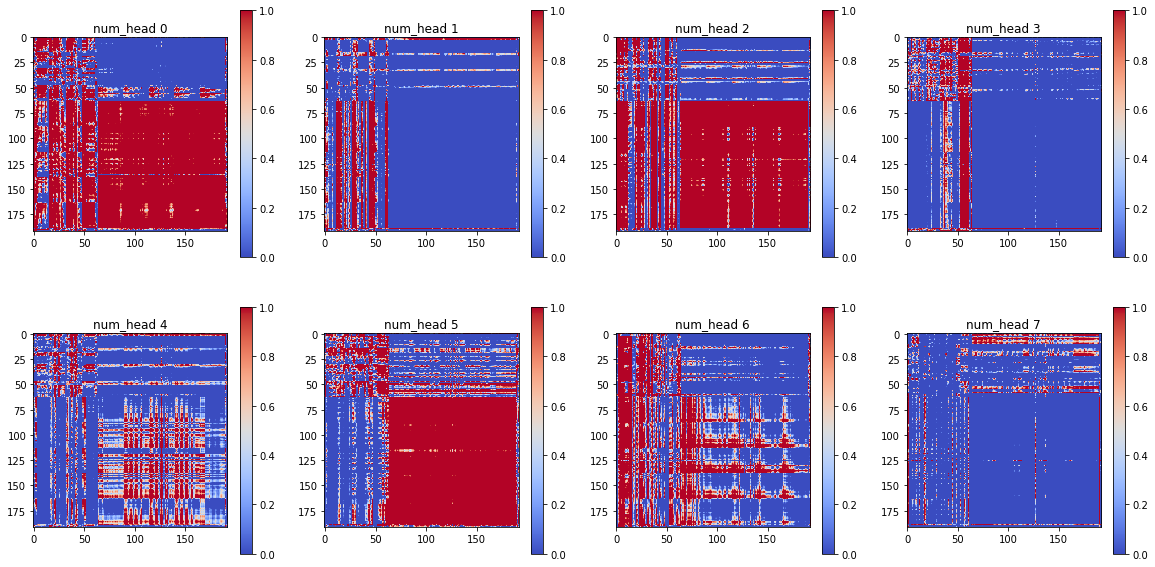

In [3]:
import torch
data = torch.load("/home/zbl/sim/TIE_ECCV2022/view_data/scores_fluidfall.pt")
data.shape
data=torch.squeeze(data,dim=0)

data = data.cpu()

# 创建图形
plt.figure(figsize=(20, 10))

for i in range(8):
    # 绘制热度图
    plt.subplot(2,4,i+1)
    plt.imshow(data[i], cmap='coolwarm', origin='upper', vmin=0, vmax=1)
    # 添加颜色条
    plt.colorbar()
    # # 添加标题和标签
    plt.title('num_head ' + str(i))
    # plt.xlabel('X Axis')
    # plt.ylabel('Y Axis')



# 显示图形
plt.show()

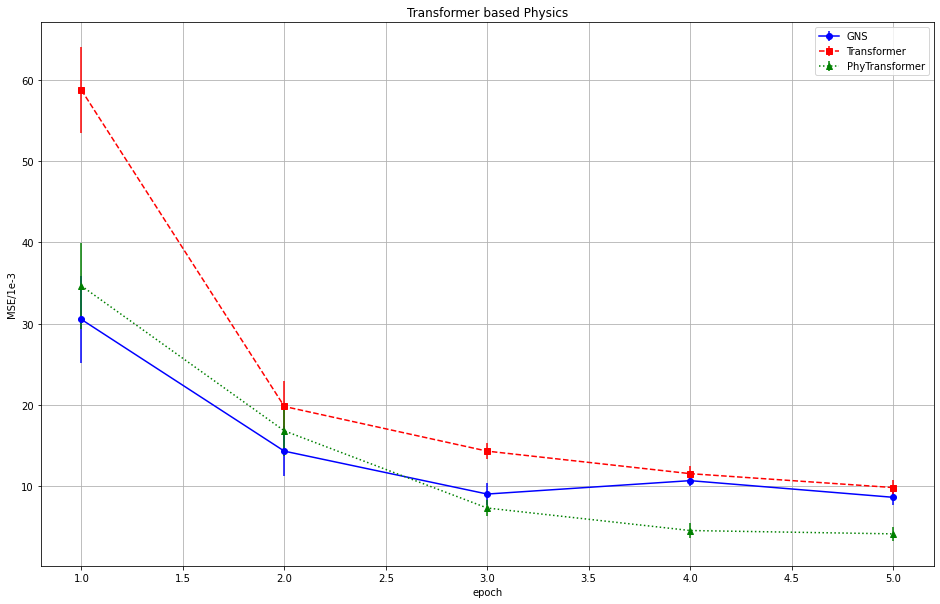

<Figure size 432x288 with 0 Axes>

In [39]:
epoch = [1, 2, 3, 4, 5]
accuracy_1 = [30.51, 14.3, 9.02, 10.67, 8.62]
accuracy_2 = [58.74, 19.8, 14.3, 11.53, 9.82]
accuracy_3 = [34.64, 16.8, 7.3, 4.53, 4.12]

std_dev_model1 = [5.31, 3.10, 1.32, 0.71, 0.91]  # 模型1的标准差
std_dev_model2 = [5.31, 3.15, 1.02, 0.91, 0.89]  # 模型2的标准差

# 创建图形
plt.figure(figsize=(16, 10))

# 绘制曲线图
plt.errorbar(iterations, accuracy_1, yerr=std_dev_model1, marker='o', linestyle='-', color='b', label='GNS')
plt.errorbar(iterations, accuracy_2, yerr=std_dev_model2, marker='s', linestyle='--', color='r', label='Transformer')
plt.errorbar(iterations, accuracy_3, yerr=std_dev_model2, marker='^', linestyle=':', color='g', label='PhyTransformer')

# 添加标题和标签
plt.title('Transformer based Physics')
plt.xlabel('epoch')
plt.ylabel('MSE/1e-3')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()
plt.savefig("/home/zbl/sim/TIE_ECCV2022/imgs/GNN_vs_Transformer.png")

<function matplotlib.pyplot.show(close=None, block=None)>

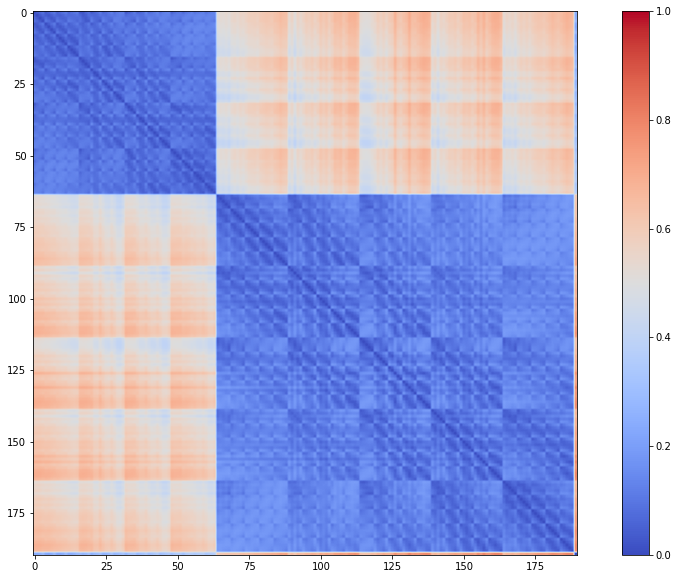

In [4]:
def compute_distance_matrix(points):
    # points 的形状为 [3, 1024]
    num_points = points.shape[1]  # 1024
    # 计算每对点之间的平方距离
    distances = torch.cdist(points, points, p=2)  # cdist 直接计算欧几里得距离
    return distances

# 调用函数计算距离矩阵
points = torch.load("/home/zbl/sim/TIE_ECCV2022/view_data/positions_fluidfall.pt")
points = torch.tensor(points)

distance_matrix = compute_distance_matrix(points)
plt.figure(figsize=(16, 10))
plt.imshow(distance_matrix, cmap='coolwarm', origin='upper', vmin=0, vmax=1)
    # 添加颜色条
plt.colorbar()
plt.show

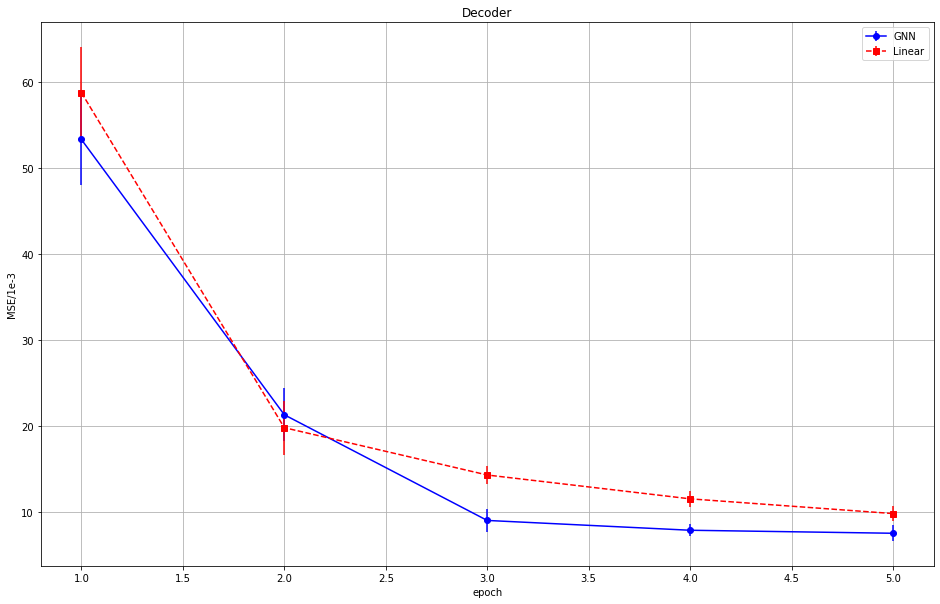

In [48]:
epoch = [1, 2, 3, 4, 5]
accuracy_1 = [53.29, 21.3, 9.02, 7.88, 7.53]
accuracy_2 = [58.74, 19.8, 14.3, 11.53, 9.82]

std_dev_model1 = [5.31, 3.10, 1.32, 0.71, 0.91]  # 模型1的标准差
std_dev_model2 = [5.31, 3.15, 1.02, 0.91, 0.89]  # 模型2的标准差

# 创建图形
plt.figure(figsize=(16, 10))

# 绘制曲线图
plt.errorbar(iterations, accuracy_1, yerr=std_dev_model1, marker='o', linestyle='-', color='b', label='GNN')
plt.errorbar(iterations, accuracy_2, yerr=std_dev_model2, marker='s', linestyle='--', color='r', label='Linear')

# 添加标题和标签
plt.title('Decoder')
plt.xlabel('epoch')
plt.ylabel('MSE/1e-3')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()

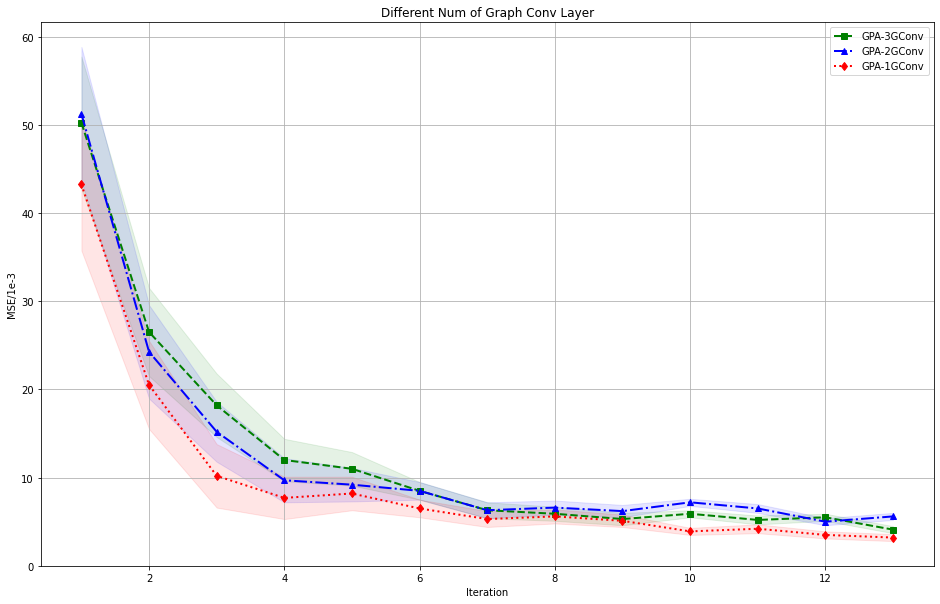

<Figure size 432x288 with 0 Axes>

In [18]:
# 假设的迭代次数和准确率数据
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
y3 = np.array([44.26, 26.27, 17.2, 9.3, 9.6, 8.9, 7.8, 6.9, 5.9, 6.7, 4.9, 5.2, 5.5])
y3 = np.array([51.26, 24.27, 15.2, 9.7, 9.2, 8.5, 6.3, 6.6, 6.2, 7.2, 6.5, 5.0, 5.6])
y4 = np.array([43.26, 20.52, 10.2, 7.7, 8.2, 6.5, 5.3, 5.6, 5.1, 3.9, 4.2, 3.5, 3.2])
 
std3 = np.array([7.8, 5.2, 3.9, 2.6, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
std3 = np.array([7.6, 5.3, 3.4, 2.5, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
std4 = np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 

# 创建图形
plt.figure(figsize=(16, 10))

# # 绘制曲线图
# plt.errorbar(iterations, accuracy_1, yerr=std_dev_model1, marker='o', linestyle='-', color='b', label='GCN')
# plt.errorbar(iterations, accuracy_2, yerr=std_dev_model2, marker='s', linestyle='--', color='r', label='GraphSage')

# 绘制四条折线图，并添加误差线


plt.plot(x, y2, label='GPA-3GConv', color='green', marker='s', linestyle='--', linewidth=2)
plt.fill_between(x, y2 - std2, y2 + std2, color='green', alpha=0.1)

plt.plot(x, y3, label='GPA-2GConv', color='blue', marker='^', linestyle='-.', linewidth=2)
plt.fill_between(x, y3 - std3, y3 + std3, color='blue', alpha=0.1)

plt.plot(x, y4, label='GPA-1GConv', color='red', marker='d', linestyle=':', linewidth=2)
plt.fill_between(x, y4 - std4, y4 + std4, color='red', alpha=0.1)

# 添加标题和标签
plt.title('Different Num of Graph Conv Layer')
plt.xlabel('Iteration')
plt.ylabel('MSE/1e-3')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()
plt.savefig("/home/zbl/sim/TIE_ECCV2022/imgs/Layer.png")

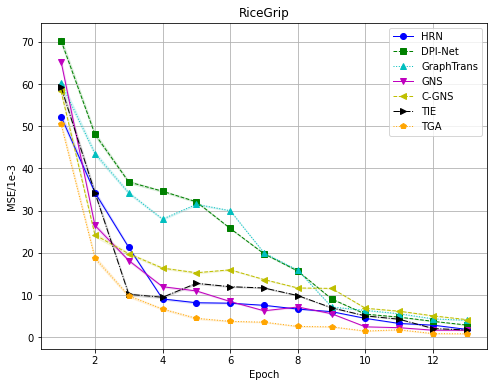

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的迭代次数和准确率数据
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
y1 = [np.array([46.26, 24.3, 20.3, 21.7, 20.7, 20.3, 18.4, 13.3, 12.0, 11.2, 11.0, 10.1, 9.1]),
      np.array([50.26, 18.1, 16.8, 12.0, 14.9, 13.0, 12.2, 11.7, 10.7, 10.2, 10.0, 8.8, 8.2]),
      np.array([41.26, 23.7, 19.4, 18.1, 17.8, 16.3, 15.6, 14.7, 13.8, 13.0, 11.4, 10.9, 8.0]),
      np.array([46.26, 23.52, 14.2, 13.8, 13.1, 12.1, 12.0, 11.7, 10.3, 9.6, 9.5, 9.1,  8.6]),
      np.array([50.26, 26.52, 18.2, 12., 11., 8.5, 6.3, 5.9, 5.3, 5.9, 5.2, 5.5, 4.4]),
      np.array([41.26, 24.27, 17.8, 15.1, 14.9, 14.3, 12.3, 12.2, 10.6, 9.3, 8.6, 7.3, 6.7]),
      np.array([41.26, 24.27, 15.2, 9.7, 9.2, 8.5, 7.3, 6.6, 5.8, 5.2, 4.5, 5.6, 4.1]),
      np.array([33.26, 20.52, 10.2, 7.7, 8.2, 6.5, 5.3, 5.6, 5.1, 3.9, 4.2, 3.5, 3.18]),]

std1 = [np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4]) 
       ,np.array([7.5, 5.0, 3.6, 2.4, 1.9, 1.0, 0.9, 0.8, 0.7, 0.4, 0.5, 0.4, 0.4])]

y2 = [np.array([86.26, 24.3, 23.3, 14.6, 10.7, 10.1, 9.6, 9.5, 6.9, 5.7, 5.4, 5.0, 3.62]),
      np.array([90.26, 18.1, 16.8, 9.4, 7.4, 7.1, 6.6, 5.6, 5.5, 4.0, 3.2, 2.8, 2.64]),
      np.array([91.26, 23.7, 21.4, 18.1, 17.8, 16.3, 15.6, 14.7, 13.8, 13.0, 11.4, 10.9, 8.1]),
      np.array([86.26, 23.52, 14.2, 11.0, 10.9, 8.2, 7.4, 7.1, 6.2, 3.7, 3.3, 3.1,  3.01]),
      np.array([80.26, 26.52, 18.2, 12., 11., 8.5, 6.3, 5.9, 5.3, 5.9, 5.2, 5.5, 2.74]),
      np.array([81.26, 24.27, 17.8, 9.5, 8.4, 8.3, 5.1, 4.0, 3.8, 3.7, 3.2, 2.6, 2.27]),
      np.array([81.26, 24.27, 9.2, 6.0, 3.4, 4.7, 2.5, 3.9, 3.8, 2.9, 2.1, 2.1, 1.89]),
      np.array([86.5, 20.8, 4.1, 3.8, 2.5, 1.9, 1.3, 2.5, 3.3, 3.1, 3.0, 2.4, 1.16]),]

std2 = np.array([0.75, 0.5, 0.3, 0.2, 0.2, 0.1, 0.09, 0.08, 0.07, 0.04, 0.05, 0.04, 0.04])

y3 = [np.array([92.26, 54.3, 23.3, 14.6, 10.7, 10.1, 9.6, 9.5, 6.9, 5.7, 5.4, 5.0, 3.58]),
      np.array([90.26, 58.1, 16.8, 9.4, 7.4, 7.1, 6.6, 5.6, 5.5, 4.0, 3.2, 2.8, 1.89]),
      np.array([81.26, 63.7, 21.4, 18.1, 17.8, 16.3, 15.6, 14.7, 13.8, 13.0, 11.4, 10.9, 8.1]),
      np.array([80.26, 43.52, 14.2, 11.0, 10.9, 8.2, 7.4, 7.1, 6.2, 3.7, 3.3, 3.1,  1.66]),
      np.array([85.26, 26.52, 18.2, 12., 11., 8.5, 6.3, 5.9, 5.3, 5.9, 5.2, 5.5, 1.92]),
      np.array([78.26, 24.27, 17.8, 9.5, 8.4, 8.3, 5.1, 4.0, 3.8, 3.7, 3.2, 2.6, 1.56]),
      np.array([79.26, 34.27, 10.2, 9.5, 12.8, 12.0, 11.7, 9.9, 7.0, 5.1, 4.3, 2.1, 1.68]),
      np.array([70.5, 18.8, 9.8, 6.7, 4.5, 3.8, 3.6, 3.0, 2.7, 2.4, 2.2, 2.4, 1.56]),]

std3 = np.array([0.75, 0.5, 0.3, 0.2, 0.2, 0.1, 0.09, 0.08, 0.07, 0.04, 0.05, 0.04, 0.04])

y4 = [np.array([52.26, 34.3, 21.3, 9.1, 8.2, 8.1, 7.6, 6.7, 6.1, 4.5, 3.3, 2.9, 1.89]),
      np.array([70.26, 48.1, 36.8, 34.6, 32.1, 25.8, 19.8, 15.7, 9.1, 5.5, 4.8, 3.8, 2.92]),
      np.array([61.26, 40.7, 21.4, 18.1, 17.8, 16.3, 15.6, 14.7, 13.8, 13.0, 11.4, 10.9, 4.04]),
      np.array([60.26, 43.52, 34.2, 28.0, 31.5, 30.0, 20.0, 15.9, 7.2, 6.4, 5.6, 4.4, 4.04]),
      np.array([65.26, 26.52, 18.2, 12., 11., 8.5, 6.3, 7.2, 5.6, 2.5, 2.3, 1.7, 1.70]),
      np.array([58.26, 24.27, 19.8, 16.4, 15.3, 16.0, 13.7, 11.7, 11.6, 6.9, 6.2, 5.1, 4.21]),
      np.array([59.26, 34.27, 10.2, 9.5, 12.8, 12.0, 11.7, 9.9, 7.0, 5.1, 4.3, 2.1, 1.75]),
      np.array([50.5, 18.8, 9.8, 6.7, 4.5, 3.8, 3.6, 2.6, 2.5, 1.5, 1.8, 0.9, 0.85]),]

std4 = np.array([0.75, 0.5, 0.3, 0.2, 0.2, 0.1, 0.09, 0.08, 0.07, 0.04, 0.05, 0.04, 0.04])

# 创建图形
plt.figure(figsize=(8, 6))

# # 绘制曲线图
# plt.errorbar(iterations, accuracy_1, yerr=std_dev_model1, marker='o', linestyle='-', color='b', label='GCN')
# plt.errorbar(iterations, accuracy_2, yerr=std_dev_model2, marker='s', linestyle='--', color='r', label='GraphSage')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']
models = ['HRN', 'DPI-Net', 'CCov', 'GraphTrans', 'GNS', 'C-GNS', 'TIE', 'TGA']

for i in range(8):
    if i == 2:
        continue
    plt.plot(x, y4[i], label=models[i], color=colors[i], marker=markers[i], linestyle=linestyles[i], linewidth=1)
    plt.fill_between(x, y4[i] - std3, y4[i] + std4, color=colors[i], alpha=0.1)

# 添加标题和标签
plt.title('RiceGrip')
plt.xlabel('Epoch')
plt.ylabel('MSE/1e-3')

# 显示网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()

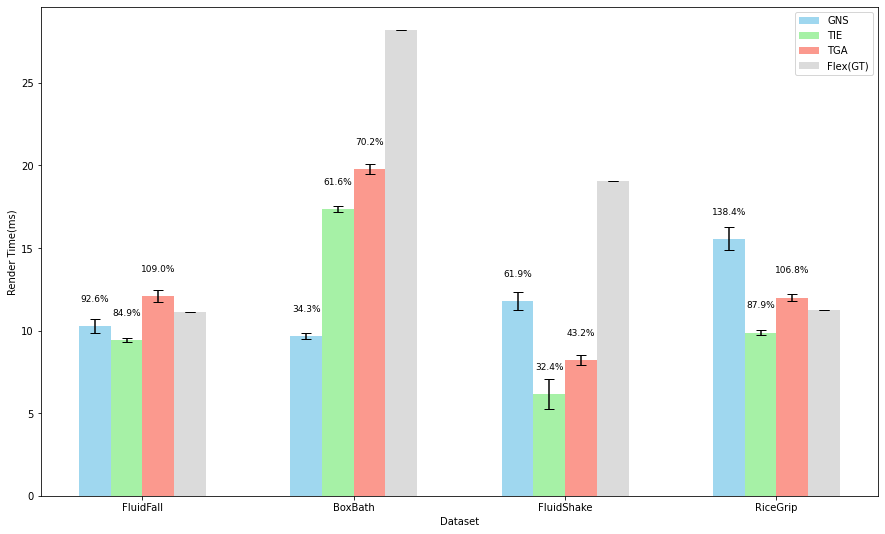

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['FluidFall', 'BoxBath', 'FluidShake', 'RiceGrip']  # 横轴的四个坐标
object1_values = [10.28, 9.67, 11.8, 15.56]  # 对象1的值
object2_values = [9.42, 17.36, 6.17, 9.88]   # 对象2的值
object3_values = [12.1, 19.8, 8.23, 12.0]   # 对象3的值
object4_values = [11.1, 28.2, 19.05, 11.24]  # 对象4的值

# 标准差
object1_std = [0.45, 0.21, 0.53, 0.68]  # 对象1的标准差
object2_std = [0.13, 0.16, 0.89, 0.16]  # 对象2的标准差
object3_std = [0.35, 0.30, 0.31, 0.19]  # 对象3的标准差
object4_std = [0, 0, 0, 0]  # 对象4的标准差

# 柱状图的宽度
bar_width = 0.15

# 横轴的位置
x = np.arange(len(categories))

# 创建柱状图
plt.figure(figsize=(15, 9))

# 绘制每个对象的柱状图，并添加误差条
plt.bar(x - 1.5 * bar_width, object1_values, width=bar_width, label='GNS', color='skyblue', alpha=0.8, yerr=object1_std, capsize=5)
plt.bar(x - 0.5 * bar_width, object2_values, width=bar_width, label='TIE', color='lightgreen', alpha=0.8, yerr=object2_std, capsize=5)
plt.bar(x + 0.5 * bar_width, object3_values, width=bar_width, label='TGA', color='salmon', alpha=0.8, yerr=object3_std, capsize=5)
plt.bar(x + 1.5 * bar_width, object4_values, width=bar_width, label='Flex(GT)', color='lightgray', alpha=0.8, yerr=object4_std, capsize=5)

# 计算百分比（其他对象的值除以对象4的值）
object1_percent = [round((o1 / o4) * 100, 1) for o1, o4 in zip(object1_values, object4_values)]
object2_percent = [round((o2 / o4) * 100, 1) for o2, o4 in zip(object2_values, object4_values)]
object3_percent = [round((o3 / o4) * 100, 1) for o3, o4 in zip(object3_values, object4_values)]

# 在柱状图上显示百分比
for i in range(len(categories)):
    plt.text(x[i] - 1.5 * bar_width, object1_values[i] + 1.5, f'{object1_percent[i]}%', ha='center', fontsize=9)
    plt.text(x[i] - 0.5 * bar_width, object2_values[i] + 1.5, f'{object2_percent[i]}%', ha='center', fontsize=9)
    plt.text(x[i] + 0.5 * bar_width, object3_values[i] + 1.5, f'{object3_percent[i]}%', ha='center', fontsize=9)

# 添加横轴标签
plt.xticks(x, categories)

# 添加标签和标题
plt.xlabel('Dataset')
plt.ylabel('Render Time(ms)')
# plt.title('')

# 添加图例
plt.legend()

# 显示图表
plt.show()